# Feature Information
<table style='margin-left: auto; margin-right: auto'>
    <tr>
        <th colspan='3'> Wrangled DOHMH Dog Bite Data </th>
    <tr>
    <tr>
        <th> Column Name </th>
        <th> Description </th>
        <th> Data Type </th>
    </tr>    
    <tr>
        <td> date_of_bite </th>
        <td> Date bitten </th>
        <td> DateTime </th>
    </tr>
    <tr>
        <td> year </th>
        <td> Reported on a specific year </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> month </th>
        <td> Reported on a specific month </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> day </th>
        <td> Reported on a specific month </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> day_of_week </th>
        <td> Reported on a specific day of week </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> borough </th>
        <td> Dog bite Borough. </th>
        <td> Text </th>
    </tr>
    <tr>
        <td> zip_code </th>
        <td> Dog bite ZipCode. </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> latitude </th>
        <td> Latitude of Zip Code </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> longitude </th>
        <td> Longitude of Zip Code </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> spay_neuter </th>
        <td> Surgical removal of dog's reproductive organs. True (reported to DOHMH as Spayed or Neutered), False (Unknown or Not Spayed or Neutered) </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> mixed/other </th>
        <td> Indicates that the dog was a mixed or other breed.  </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> pit_bull </th>
        <td> Indicates that the dog was a pit bull.  </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> shih_tzu </th>
        <td> Indicates that the dog was a shih tzu.  </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> chihuahua </th>
        <td> Indicates that the dog was a chihuahua. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> german_shepherd </th>
        <td> Indicates that the dog was a german shepherd. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> bull_dog </th>
        <td> Indicates that the dog was a bull dog. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> labrador_retriever </th>
        <td> Indicates that the dog was a labrador retriever. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> maltese </th>
        <td> Indicates that the dog was a maltese. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> husky </th>
        <td> Indicates that the dog was a husky. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> standard_poodle </th>
        <td> Indicates that the dog was a standard poodle. </th>
        <td> Boolean </th>
    </tr>
</table>

# Import

In [1]:
# libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, homogeneity_completeness_v_measure
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from folium.plugins import HeatMap
from kneed import KneeLocator

In [2]:
# import data
wrangled = pd.read_csv('../data/processed/dog_bite_wrangled.csv')

# display
wrangled.head()

,date_of_bite,year,month,day,day_of_week,borough,zip_code,latitude,longitude,spay_neuter,...,pit_bull,german_shepherd,shih_tzu,chihuahua,yorkshire_terrier,bull_dog,labrador_retriever,maltese,husky,standard_poodle
0,2018-01-01,2018,1,1,0,brooklyn,11220,40.641026,-74.016688,False,...,False,False,False,False,False,False,False,False,False,False
1,2018-01-06,2018,1,6,5,brooklyn,11224,40.577372,-73.988706,False,...,True,False,False,False,False,False,False,False,False,False
2,2018-01-08,2018,1,8,0,brooklyn,11231,40.677916,-74.005154,False,...,False,False,False,False,False,False,False,False,False,False
3,2018-01-09,2018,1,9,1,brooklyn,11224,40.577372,-73.988706,False,...,True,False,False,False,False,False,False,False,False,False
4,2018-01-03,2018,1,3,2,brooklyn,11231,40.677916,-74.005154,False,...,False,False,False,False,False,False,False,False,False,False


# Preprocessing
Feats to use:  
* year  
* month  
* day_of_week  
* latitude  
* longitude  

In [ ]:
# drop other data
feats_to_keep = ['year', 'month', 'day_of_week', 'latitude', 'longitude']
prep_final = wrangled[feats_to_keep]

prep_final.head()

,year,month,day_of_week,latitude,longitude
0,2018,1,0,40.641026,-74.016688
1,2018,1,5,40.577372,-73.988706
2,2018,1,0,40.677916,-74.005154
3,2018,1,1,40.577372,-73.988706
4,2018,1,2,40.677916,-74.005154


In [15]:
# normalize data
# copy prep_init to prep_norm
prep_norm = prep_final.copy()

# min-max scaling
mm_scaler = MinMaxScaler()
feats_mm_scale = ['latitude', 'longitude', 'year']
prep_norm[feats_mm_scale] = mm_scaler.fit_transform(prep_norm[feats_mm_scale])

# standard scaling
# st_scaler = StandardScaler()
# feats_st_scale = ['year']
# prep_norm[feats_st_scale] = st_scaler.fit_transform(prep_norm[feats_st_scale])

# cyclic encoding, important for temporal features i.e. Nov=11->Dec=12->Jan=1
prep_norm['month_sin'] = np.sin(2 * np.pi * prep_norm['month'] / 12)
prep_norm['month_cos'] = np.cos(2 * np.pi * prep_norm['month'] / 12)
prep_norm['dow_sin'] = np.sin(2 * np.pi * prep_norm['day_of_week'] / 7)
prep_norm['dow_cos'] = np.cos(2 * np.pi * prep_norm['day_of_week'] / 7)

# drop original temporal features
prep_norm.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)

# display
prep_norm.head()

,year,latitude,longitude,month_sin,month_cos,dow_sin,dow_cos
0,0.428571,0.339782,0.424821,0.5,0.866025,0.000000,1.000000
1,0.428571,0.177495,0.477559,0.5,0.866025,-0.974928,-0.222521
2,0.428571,0.433834,0.446559,0.5,0.866025,0.000000,1.000000
3,0.428571,0.177495,0.477559,0.5,0.866025,0.781831,0.623490
4,0.428571,0.433834,0.446559,0.5,0.866025,0.974928,-0.222521


In [16]:
# copy prep_norm to prep_final
prep_final = prep_norm.copy()

# DBSCAN

In [23]:
# store results
results = {}

# loop through min_samples to look for best value
for min_samples in range(20, 41):
    # find distances to the k-th nearest neighbor
    nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
    nearest_neighbors.fit(prep_final)
    distances, indices = nearest_neighbors.kneighbors(prep_final)

    # sort distances
    k_distances = distances[:, min_samples-1]
    k_distances = np.sort(k_distances)

    # find optimal epsilon 
    kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
    eps_value = kneedle.knee
    eps = k_distances[eps_value]
    # print(f"Optimal epsilon value: {k_distances[eps_value]}")
    
    # copy prep_norm to clustered
    clustered = prep_final.copy()
    
    # eps must be greater than 0.1
    if eps < 0.1:
        continue
    
    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(prep_final)
    
    # get number of clusters
    n_clusters = len(set(clusters))
    
    # exclude cases where all points are noise
    if n_clusters > 1:
        # take metrics
        score = silhouette_score(prep_final, clusters)
        db_score = davies_bouldin_score(prep_final, clusters)
        ari_score = adjusted_rand_score(wrangled['borough'], clusters)
        homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(wrangled['borough'], clusters)
        
        # store results
        results[min_samples] = {
            'n_clusters': n_clusters,
            'eps': k_distances[eps_value],
            'silhouette_score': score,
            'davies_bouldin_score': db_score,
            'adjusted_rand_score': ari_score,
            'homogeneity': homogeneity,
            'completeness': completeness,
            'v_measure': v_measure
        }

In [24]:
# display results
results_df = pd.DataFrame(results).T
results_df

,n_clusters,eps,silhouette_score,davies_bouldin_score,adjusted_rand_score,homogeneity,completeness,v_measure
20,7.0,0.604978,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
21,7.0,0.587870,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
22,7.0,0.591254,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
23,7.0,0.610094,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
24,7.0,0.617504,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
25,7.0,0.610442,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
26,7.0,0.652295,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
27,7.0,0.652400,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
28,7.0,0.652400,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358
29,7.0,0.653623,0.158079,2.488108,0.000065,0.000404,0.000321,0.000358


Optimal epsilon value: 0.4367033096603952


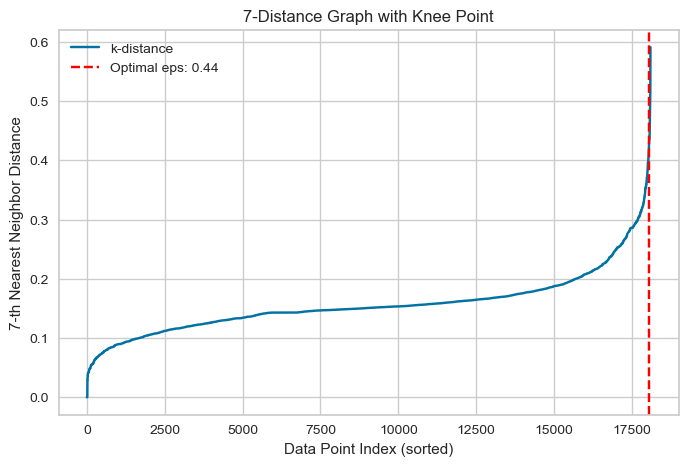

In [25]:
# plot optimum epsilon for chosen min_samples
min_samples = 7

# find distances to the k-th nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(prep_final)
distances, indices = nearest_neighbors.kneighbors(prep_final)

# sort distances
k_distances = distances[:, min_samples-1]
k_distances = np.sort(k_distances)

# find optimal epsilon
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
eps_value = kneedle.knee
print(f"Optimal epsilon value: {k_distances[eps_value]}")

# plot with knee point
plt.figure(figsize=(8, 5))
plt.plot(k_distances, label='k-distance')
plt.axvline(eps_value, color='red', linestyle='--', label=f'Optimal eps: {k_distances[eps_value]:.2f}')
plt.xlabel("Data Point Index (sorted)")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.title(f"{min_samples}-Distance Graph with Knee Point")
plt.legend()
plt.show()

In [26]:
# final clustering
# copy wrangled to clustered
clustered = prep_final.copy()

# DBSCAN clustering
dbscan = DBSCAN(eps=k_distances[eps_value], min_samples=min_samples)
clusters = dbscan.fit_predict(prep_final)

# label clusters
clustered = wrangled.copy()
clustered['cluster'] = clusters

In [27]:
# create Folium map centered on NYC
heat_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# prepare data for HeatMap
chosen_cluster = 5
heat_data = clustered[clustered['cluster']==chosen_cluster][['latitude', 'longitude']].values.tolist()

# add HeatMap layer
HeatMap(heat_data).add_to(heat_map)

# display map
heat_map

In [28]:
# check directory
output_dir = '../data/processed/maps'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# save heat maps for each cluster
for cluster_label in clustered['cluster'].unique():
    heat_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
    heat_data = clustered[clustered['cluster'] == cluster_label][['latitude', 'longitude']].values.tolist()
    HeatMap(heat_data).add_to(heat_map)
    map_path = os.path.join(output_dir, f'cluster_{cluster_label}.html')
    heat_map.save(map_path)
    print(f"Map saved to {map_path}")

# save a combined heat map for all clusters
heat_map_all = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
heat_data_all = clustered[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data_all).add_to(heat_map_all)
map_path_all = os.path.join(output_dir, 'cluster_all.html')
heat_map_all.save(map_path_all)
print(f"Combined map saved to {map_path_all}")

Map saved to ../data/processed/maps\cluster_0.html
Map saved to ../data/processed/maps\cluster_1.html
Map saved to ../data/processed/maps\cluster_2.html
Map saved to ../data/processed/maps\cluster_3.html
Map saved to ../data/processed/maps\cluster_4.html
Map saved to ../data/processed/maps\cluster_5.html
Map saved to ../data/processed/maps\cluster_6.html
Map saved to ../data/processed/maps\cluster_7.html
Map saved to ../data/processed/maps\cluster_8.html
Map saved to ../data/processed/maps\cluster_9.html
Map saved to ../data/processed/maps\cluster_10.html
Map saved to ../data/processed/maps\cluster_11.html
Map saved to ../data/processed/maps\cluster_12.html
Map saved to ../data/processed/maps\cluster_13.html
Map saved to ../data/processed/maps\cluster_14.html
Map saved to ../data/processed/maps\cluster_15.html
Map saved to ../data/processed/maps\cluster_16.html
Map saved to ../data/processed/maps\cluster_17.html
Map saved to ../data/processed/maps\cluster_18.html
Map saved to ../data/p